# Weather Data Analysis & Linear Regression

This notebook performs Exploratory Data Analysis (EDA) and Linear Regression on the provided weather dataset.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

Load the Dataset:

In [31]:

df = pd.read_csv('weather_data_extended.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          800 non-null    object 
 1   Temperature (°C)  800 non-null    float64
 2   Feels Like (°C)   800 non-null    float64
 3   Humidity (%)      798 non-null    float64
 4   Wind Speed (kph)  798 non-null    float64
 5   Cloud Cover (%)   800 non-null    int64  
 6   Pressure (mb)     798 non-null    float64
 7   UV Index          800 non-null    int64  
 8   Visibility (km)   800 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 56.4+ KB


,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16


Check for Missing Values:

In [32]:
df.isnull().sum()

Location            0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        2
Wind Speed (kph)    2
Cloud Cover (%)     0
Pressure (mb)       2
UV Index            0
Visibility (km)     0
dtype: int64

In [33]:
#dropping missing values
df = df.dropna()

Summary Statistics:

In [34]:
df.describe()

,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,16.580730,16.373804,73.513854,16.123300,43.513854,1013.041562,1.746851,10.732997
std,5.574821,7.382814,16.478897,10.338986,34.845115,7.608453,1.092285,1.966105
min,8.300000,4.500000,40.000000,3.600000,0.000000,900.000000,1.000000,10.000000
25%,15.000000,13.800000,67.000000,6.100000,0.000000,1012.000000,1.000000,10.000000
50%,16.000000,16.000000,76.000000,9.000000,50.000000,1013.000000,1.000000,10.000000
75%,24.000000,25.500000,88.000000,24.100000,75.000000,1019.250000,2.000000,10.000000
max,25.000000,27.800000,100.000000,29.900000,75.000000,1024.000000,4.000000,16.000000


In [35]:
# String indexing on 'Location' column: Converting Location column from string to integer
df['Location_index'] = df['Location'].astype('category').cat.codes

# Get unique values from each column
unique_locations = df['Location'].drop_duplicates().reset_index(drop=True)
unique_location_indices = df['Location_index'].drop_duplicates().reset_index(drop=True)

# Create a new DataFrame with both columns
unique_df = pd.DataFrame({
    'Unique_Locations': unique_locations,
    'Unique_Location_Indices': unique_location_indices
})
unique_df

,Unique_Locations,Unique_Location_Indices
0,New York,3
1,London,2
2,Tokyo,7
3,Paris,4
4,Sydney,6
5,Dubai,0
6,Rome,5
7,Hong Kong,1


Correlation Heatmap:

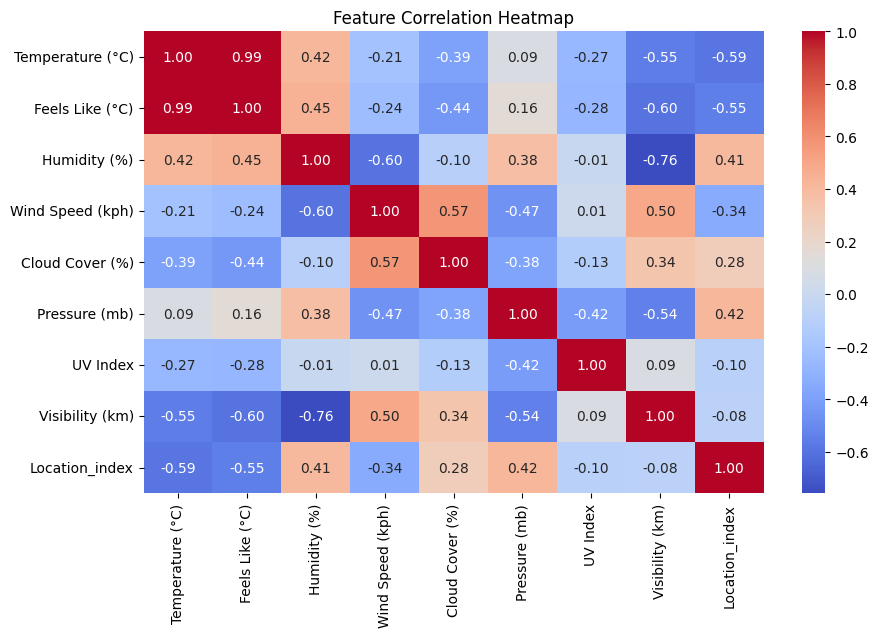

In [40]:
#Select only numeric columns before correlation
numeric_df = df.select_dtypes(include = ['number'])

#Correlation heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

Box Plot: Humidity

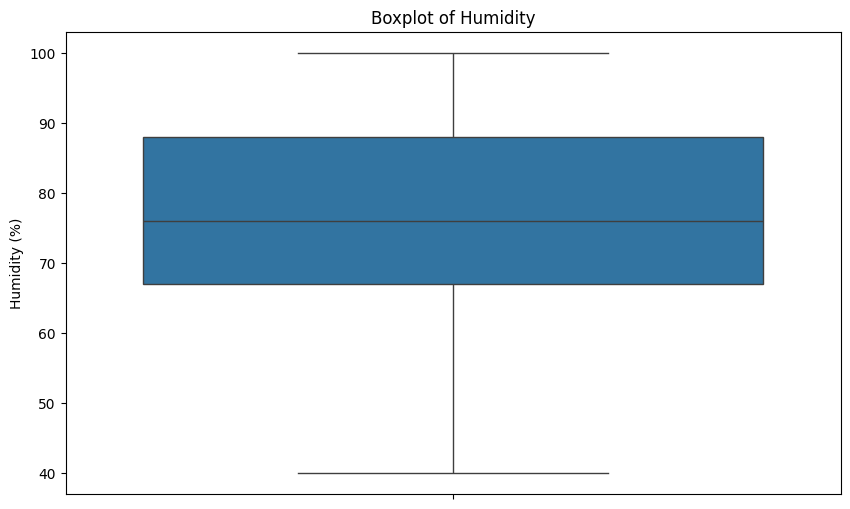

In [45]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df['Humidity (%)'])
plt.title('Boxplot of Humidity')
plt.show()

Define Features and Target Variable

In [43]:
X = df[['Humidity (%)', 'Wind Speed (kph)', 'Pressure (mb)', 'Visibility (km)', 'Location_index']]          #features
Y = df['Temperature (°C)']              #target variable or label

Standard Scaling

In [44]:
#Standard scaling the values in features
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
print(df_scaled.describe())

       Humidity (%)  Wind Speed (kph)  ...  Visibility (km)  Location_index
count    794.000000        794.000000  ...       794.000000      794.000000
mean      -0.118388          0.395739  ...         0.732997       -0.104998
std        0.784709          0.574388  ...         1.966105        0.483490
min       -1.714286         -0.300000  ...         0.000000       -0.842105
25%       -0.428571         -0.161111  ...         0.000000       -0.631579
50%        0.000000          0.000000  ...         0.000000        0.000000
75%        0.571429          0.838889  ...         0.000000        0.368421
max        1.142857          1.161111  ...         6.000000        0.631579

[8 rows x 5 columns]


Train-Test Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Train Linear Regression Model

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predictions

In [59]:
y_pred = model.predict(X_test)

Model Evaluation

In [57]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Square Error: {mse: .2f}')
print(f'R-squared Score: {r2: .2f}')

Mean Square Error:  1.94
R-squared Score:  0.94


Scatter Plot: Actual vs Predicted Temperature

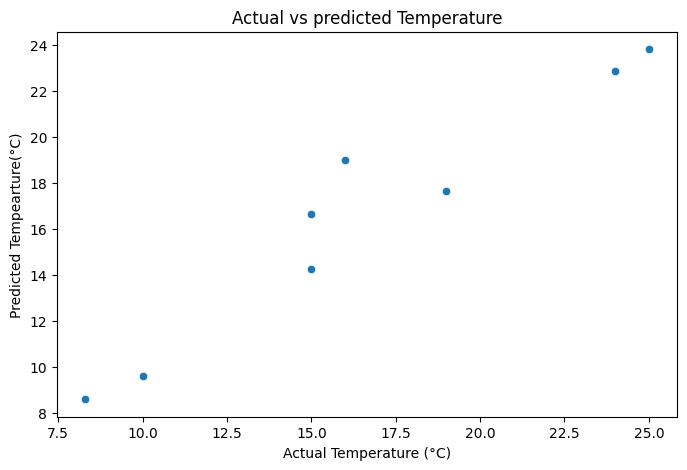

In [61]:
plt.figure(figsize = (8, 5))
sns.scatterplot (x = y_test, y =y_pred)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Tempearture(°C)')
plt.title('Actual vs predicted Temperature')
plt.show()

## Types of Linear Regression & Accuracy Comparison

In this section, we compare different types of linear regression models:

- **Lasso Regression**: L1 regularization (Lasso) encourages sparsity in the model by forcing some coefficients to be exactly zero.
- **Ridge Regression**: L2 regularization (Ridge) discourages large coefficients by shrinking them toward zero.

We will evaluate these models based on their Mean Square Error (MSE) and R-squarred Score(R²).

In [72]:
#Define models
models = {
    'Simple Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha = 1.0),
    'Lasso Regression': Lasso(alpha = 0.1 ),
}

#Store results
results = {}

#Train and evaluate each model
for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse =mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results[name] = {'MSE': mse, 'R² Score': r2}

#Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)            


                               MSE  R² Score
Simple Linear Regression  1.936225  0.941366
Ridge Regression          1.937851  0.941317
Lasso Regression          2.042094  0.938160


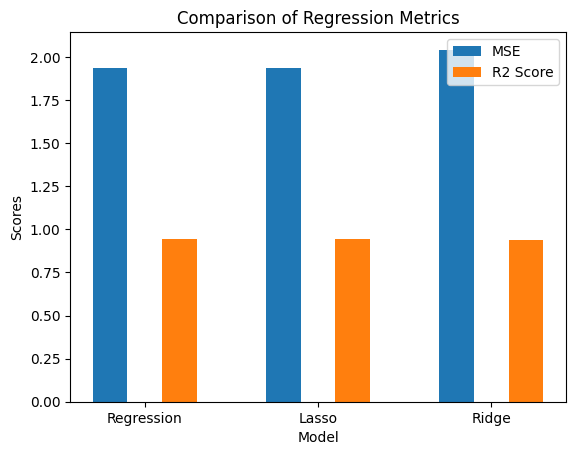

In [76]:
#plot comparison

mse = results_df['MSE']
r2_score = results_df['R² Score']

positions = np.arange(len(mse))
bar_width = 0.2

plt.bar(positions - bar_width, mse, width = bar_width, label = 'MSE')
plt.bar(positions + bar_width, r2_score, width = bar_width, label = 'R2 Score')

#adding labels and title
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Regression Metrics')

#adding the legend
plt.legend()
plt.xticks(positions, ['Regression', 'Lasso', 'Ridge'])
plt.show()